In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('BMI2.csv')

In [3]:
dataset.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='Gender', ylabel='count'>

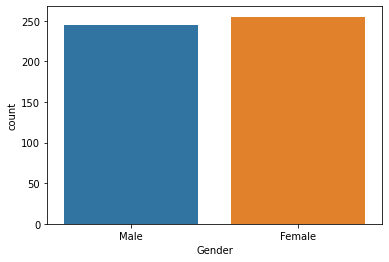

In [5]:
sns.countplot(x='Gender',data = dataset)

In [6]:
dataset.groupby('Gender').size()

Gender
Female    255
Male      245
dtype: int64

In [7]:
dataset[dataset['Gender'] == 'Male']['Height'].mean()

169.64897959183673

In [8]:
dataset[dataset['Gender'] == 'Male']['Weight'].mean()

106.31428571428572

In [9]:
dataset[dataset['Gender'] == 'Female']['Height'].mean()

170.22745098039215

In [10]:
dataset[dataset['Gender'] == 'Female']['Weight'].mean()

105.69803921568628

In [11]:
avg_data = dataset.groupby('Gender',as_index=False).mean()
print(avg_data)

   Gender      Height      Weight     Index
0  Female  170.227451  105.698039  3.709804
1    Male  169.648980  106.314286  3.787755


<AxesSubplot:xlabel='Gender', ylabel='count'>

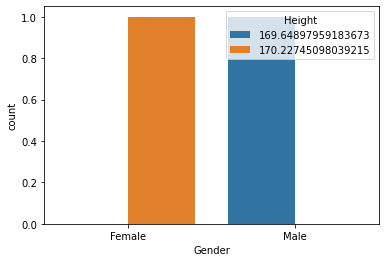

In [12]:
sns.countplot(x='Gender',hue='Height',data=avg_data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

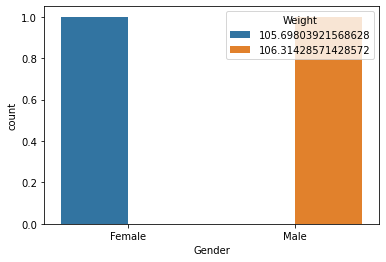

In [13]:
sns.countplot(x='Gender',hue='Weight',data=avg_data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

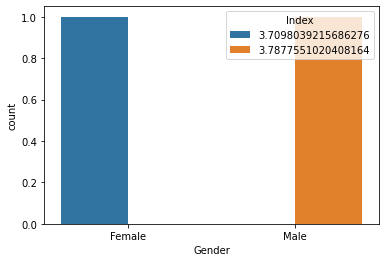

In [14]:
sns.countplot(x='Gender',hue='Index',data=avg_data)

In [15]:
dataset.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [16]:
dataset.shape

(500, 4)

In [17]:
sex=pd.get_dummies(dataset['Gender'],drop_first=True)
sex.head(4)

,Male
0,1
1,1
2,0
3,0


In [18]:
dataset = pd.concat([dataset,sex],axis=1)
dataset.head(5)



,Gender,Height,Weight,Index,Male
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1


In [19]:
dataset.drop('Gender',axis=1,inplace=True)
dataset.head(5)

,Height,Weight,Index,Male
0,174,96,4,1
1,189,87,2,1
2,185,110,4,0
3,195,104,3,0
4,149,61,3,1


In [20]:
X = dataset.drop('Index',axis=1)
y = dataset['Index']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
# K Nearest Neighbor
from sklearn.metrics import accuracy_score
from sklearn import preprocessing,neighbors
clsf = neighbors.KNeighborsClassifier()
clsf.fit(X_train,y_train)
pred_y = clsf.predict(X_test)
accuracy_score(y_test,pred_y)*100

92.66666666666666

In [23]:
# Saving model to disk
import pickle
pickle.dump(clsf, open('model1.pkl','wb'))

In [24]:
model = pickle.load(open('model1.pkl','rb'))
model.predict([[170,58.5,1]])

array([2], dtype=int64)

In [25]:
dataset.Weight.dtypes

dtype('int64')